 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 05 - Isolated digit recognition using Dynamic Time Warping (DTW) algorithm </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Dynamic Time Warping </b> <br>
We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

**Part1**

In this part of the assignment, you need to code the DTW algorithm from scratch.

1. Given two templates, Write a dynamic time warping algorithm to obtain the optimal distance between them.

> Compute the distance matrix between the two templates


> Compute the accumulative distance matrix


> Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance   


> Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes



optimal distance:  20.0


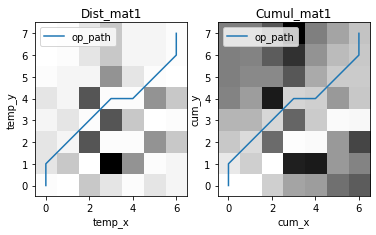

In [ ]:
import numpy as np
###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################

def DTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
  Dis=np.zeros((len(template1),len(template2)),float)
  for i in range(len(template1)):
    for j in range(len(template2)):
      Dis[i,j]=np.sum((template1[i] - template2[j])**2)
  D=Dis
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
  DTW_cumulate_Matrix =np.zeros((D.shape),float)    # cummulative distance matrix
    #Iterate through the sequence of features in templates and compute the distance between the templates.
  for i in range(len(template1)): #you can start from 1
    for j in range(len(template2)):
      if (i==0) and (j!=0):
      #print("j",C[i,j-1])
        DTW_cumulate_Matrix[0,j]=D[0,j]+DTW_cumulate_Matrix[0,j-1]
      elif(j==0) and (i!=0):
        DTW_cumulate_Matrix[i,0]=D[i,0]+DTW_cumulate_Matrix[i-1,0]
      elif (i!=0) and (j!=0):
        m=min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
        DTW_cumulate_Matrix[i,j]=D[i,j]+m
      elif (i==0) and (j==0):
        DTW_cumulate_Matrix[0,0]=D[0,0]
    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
  opt_distance = 0.0
  k = len(template1)-1# length of the template1
  l = len(template2)-1# length of the template2
  #print("k,l",k,l)
  opt_dtw_path=[]
  opt_dtw_path.append((k,l))
  while (k>0 and l>0):          #Start from the last point and backtrack
    mi=min(DTW_cumulate_Matrix[k-1,l-1],DTW_cumulate_Matrix[k,l-1],DTW_cumulate_Matrix[k-1,l])
    if (mi==DTW_cumulate_Matrix[k-1,l]):
      opt_dtw_path.append(([k-1,l]))
      k,l=k-1,l
    elif (mi==DTW_cumulate_Matrix[k-1,l-1]):
      opt_dtw_path.append(([k-1,l-1]))
      k,l=k-1,l-1
    elif (mi==DTW_cumulate_Matrix[k,l-1]):
      opt_dtw_path.append(([k,l-1]))
      k,l=k,l-1
  opt_dtw_path.append((0,0))
  opt_dtw_path=np.asarray(opt_dtw_path)
  # for [x, y] in opt_dtw_path:
  #   opt_distance = opt_distance +D[x, y]
  opt_distance=DTW_cumulate_Matrix[-1,-1]
  return D,DTW_cumulate_Matrix,opt_dtw_path,opt_distance
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

import matplotlib.pyplot as plt
def plotDTWpath(template1,template2,t):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    #Compute distance and cumulative distance between the given templates
  Dst,C,op_path,op_dis=DTW(template1,template2)
  op_path=np.asarray(op_path)
  print("optimal distance: "+str(t),op_dis)
  plt.figure()
  plt.subplot(1,2,1)
  #print("figure ",t)
  plt.imshow(Dst.T, interpolation='nearest', cmap='Greys')
  plt.gca().invert_yaxis()
  plt.plot(op_path[:,0],op_path[:,1],label='op_path')
  plt.title("Dist_mat"+str(t))
  plt.xlabel("temp_x")
  plt.ylabel("temp_y")
  plt.legend()
  #plt.grid()
  plt.subplot(1,2,2)
  plt.imshow(C.T, interpolation='nearest', cmap='Greys')
  plt.gca().invert_yaxis()
  plt.plot(op_path[:,0],op_path[:,1],label='op_path')
  plt.title("Cumul_mat"+str(t))
  plt.xlabel("cum_x")
  plt.ylabel("cum_y")
  plt.legend()
  #plt.grid()
  return opt_dis

  #Plot the optimal path on distance and cumulative matrices and verify the DTW codes

t1=np.array([4,3,7,0,2,6,5])
t2=np.array([3,7,1,6,1,5,4,4])
opt_dis=plotDTWpath(t1,t2,1)
########### OBSERVATION: from the below figures the optimal path is verified  and is plotted on the distance matrix and the cumulative distance matrix


**Part2**

In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm

1. Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.
2. Record three further repetitions of the same digits (isolated words) as test data.  
3. The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated word recognition with the help of the DTW codes
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts.
7. Create a confusion matrix and report the most confusing digits.


**Module to record the voice in online mode**

In [ ]:
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD ='''
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
'''


def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('9_4.wav', 16000, fp_arr) #Please change the name.


rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [ ]:
import scipy.io.wavfile as wav
import speechpy
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  #print(mfcc_feat_cmvn)
  return mfcc_feat_cmvn


**Algorithm to perform isolated digit recognition**

In [ ]:
from google.colab import drive
import os
import soundfile as sf
import numpy as np
##########accessing already recorded audios
drive.mount('/content/drive')
bacground_data_location1='/content/drive/My Drive/prml/10_samp/' #Change this location
bacground_data_location2='/content/drive/My Drive/prml/30_samp/' #Change this location
bacground_data_files1=[]
bacground_data_files2=[]
for root1, dirs1, files1 in os.walk(bacground_data_location1):
    for file in files1:
        if file.endswith(".wav"):
             bacground_data_files1.append(os.path.join(root1, file))
bacground_data_files1= np.array(bacground_data_files1)
for root2, dirs2, files2 in os.walk(bacground_data_location2):
    for file in files2:
        if file.endswith(".wav"):
             bacground_data_files2.append(os.path.join(root2, file))
bacground_data_files2= np.array(bacground_data_files2)


############ (ques (2_4)) Algorithm to perform isolated digit recognition#############
optimal_distances=np.zeros((len(bacground_data_files2),len(bacground_data_files1)),float)
for i in range(len(bacground_data_files2)):
  tmp1=MFCC(bacground_data_files2[i])
  for j in range(len(bacground_data_files1)):#len(bacground_data_files2)):
    tmp2=MFCC(bacground_data_files1[j])
    d,cum,op_p,optimal_distances[i,j]=DTW(tmp1,tmp2)
pred=np.argmin(optimal_distances,axis=1)
act=np.array([0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

accuracy of the model for the recorded samples :  53.333333333333336
confusion matrix
 [[2 0 0 0 1 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0]
 [0 1 2 0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0 0]
 [0 0 0 1 2 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 2]
 [0 0 0 0 0 0 2 1 0 0]
 [0 0 0 1 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 2 1]]


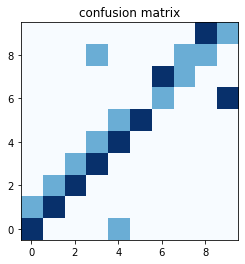

In [ ]:
##############(ques (2_6)) digit recognition accuracy##################
accu=(np.sum(pred==act)/30)*100
print("accuracy of the model for the recorded samples : ",accu)
#############(ques (2_7)) confusion matrix############
conf_mat=np.zeros((10,10),int)
for i in range(30):
  conf_mat[act[i],pred[i]]=conf_mat[act[i],pred[i]]+1
print("confusion matrix\n",conf_mat)
plt.title('confusion matrix')
plt.imshow(conf_mat, interpolation='nearest', cmap='Blues')
plt.gca().invert_yaxis()

####### OBSERVATION: from the below confusion matrix , it can be observed that the digit six gets confused with nine and one of each repeated digits are misclassified

**Plot the optimal DTW path**

DTW between temp1 and temp2
optimal distance:  611904.4485473633
DTW between temp1 and temp3
optimal distance:  774882.1303100586


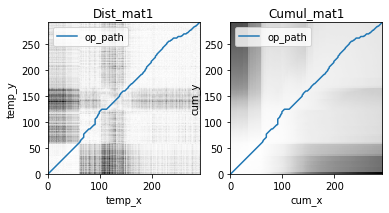

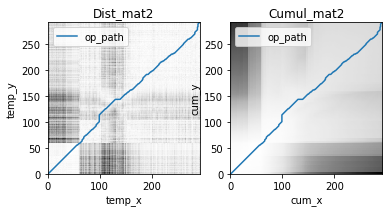

In [ ]:
##############que (2_5) Take two pairs such that one pair is the repetition of the same digit and another one is two different digits.
##############Plot the optimal DTW path on distance and cumulative distance matrices for both cases.
tem1=MFCC(bacground_data_files1[0])
tem2=MFCC(bacground_data_files2[0])
print("DTW between temp1 and temp2")
o_d12=plotDTWpath(tem1,tem2,1)
tem3=MFCC(bacground_data_files2[15])

print("DTW between temp1 and temp3")
o_d13=plotDTWpath(tem1,tem3,2)


**Part3**

In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker.
3. Please report some of the changes to improve the system performance.

In [ ]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf
#########connsidering 100 audio files of speaker1 and speaker2 as test data (each digit 10 samples) and 10 audio files of speaker1 as train/reference data)
drive.mount('/content/drive')
bacground_data_location3='/content/drive/My Drive/prml/sp1/' #Change this location
bacground_data_location4='/content/drive/My Drive/prml/sp3/' #Change this location
bacground_data_location5='/content/drive/My Drive/prml/sp1_alldigits_10_samples/' #Change this location
bacground_data_location6='/content/drive/My Drive/prml/sp2/' #Change this location
bacground_data_files3=[]
bacground_data_files4=[]
bacground_data_files5=[]
bacground_data_files6=[]
for root3, dirs3, files3 in os.walk(bacground_data_location3):
    for file in files3:
        if file.endswith(".wav"):
             bacground_data_files3.append(os.path.join(root3, file))
bacground_data_files3.sort()
bacground_data_files3 = np.array(bacground_data_files3)
for root4, dirs4, files4 in os.walk(bacground_data_location4):
    for file in files4:
        if file.endswith(".wav"):
             bacground_data_files4.append(os.path.join(root4, file))
bacground_data_files4.sort()
bacground_data_files4 = np.array(bacground_data_files4)
for root5, dirs5, files5 in os.walk(bacground_data_location5):
    for file in files5:
        if file.endswith(".wav"):
             bacground_data_files5.append(os.path.join(root5, file))
bacground_data_files5.sort()
bacground_data_files5 = np.array(bacground_data_files5)
for root6, dirs6, files6 in os.walk(bacground_data_location6):
    for file in files6:
        if file.endswith(".wav"):
             bacground_data_files6.append(os.path.join(root6, file))
bacground_data_files6.sort()
bacground_data_files6 = np.array(bacground_data_files6)
## Iterate through the files and load them using "sig,sr = sf.read(filename)""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


accuracy in percentage 84.0
confusion matrix
 [[ 9  1  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  1  0]
 [ 0  0  8  0  0  0  0  0  2  0]
 [ 0  0  0  9  1  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  1  0  0]
 [ 0  0  0  0  0  6  1  0  3  0]
 [ 0  0  0  0  0  0  5  1  4  0]
 [ 0  0  0  0  0  0  0  9  1  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 10]]


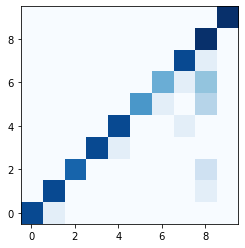

In [ ]:
############ Algorithm to perform isolated digit recognition#############
############e performance between a pair of templates with the same speaker
optimal_distances35=np.zeros((len(bacground_data_files3),len(bacground_data_files5)),float)

for i in range(len(bacground_data_files3)):
  tmp35_1=MFCC(bacground_data_files3[i])
  for j in range(len(bacground_data_files5)):#len(bacground_data_files2)):
    tmp35_2=MFCC(bacground_data_files5[j])
    d35,cum35,op_p35,optimal_distances35[i,j]=DTW(tmp35_1,tmp35_2)
pred_35=np.argmin(optimal_distances35,axis=1)
act_35=[]
for i in range(10):
  for j in range(10):
    act_35.append(i)
act_35=np.asarray(act_35)
##########accuaracy of the model when ten templates are considered with the same speaker
acc_35=(np.sum(pred_35==act_35)/100)*100
print("accuracy in percentage",acc_35)
#######confusion matrix
conf_mat35=np.zeros((10,10),int)
# print(act_35)
# print(pred_35)
for i in range(100):
  conf_mat35[act_35[i],pred_35[i]]=conf_mat35[act_35[i],pred_35[i]]+1
print("confusion matrix\n",conf_mat35)

plt.imshow(conf_mat35, interpolation='nearest', cmap='Blues')
plt.gca().invert_yaxis()

#######OBSERVATIONS: from the confusion matrix below, it can be observed that the digits five and six are confused with digits eight
###########The accuracy produced by the model for isolated digit recognition with the same speaker is found to be good when compared to the accuracy produced by the model for different speakers

accuracy in percentage 12.0
confusion matrix
 [[ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  2  0  0  8  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  7  0  0  3  0]]


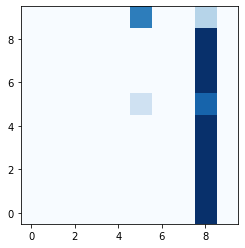

In [ ]:
############ Algorithm to perform isolated digit recognition#############
############e performance between a pair of templates with the different speaker1 and speaker3 from the given dataset
optimal_distances45=np.zeros((len(bacground_data_files4),len(bacground_data_files5)),float)

for i in range(len(bacground_data_files4)):
  tmp45_1=MFCC(bacground_data_files4[i])
  for j in range(len(bacground_data_files5)):#len(bacground_data_files2)):
    tmp45_2=MFCC(bacground_data_files5[j])
    d45,cum45,op_p45,optimal_distances45[i,j]=DTW(tmp45_2,tmp45_1)
pred_45=np.argmin(optimal_distances45,axis=1)
act_45=[]
for i in range(10):
  for j in range(10):
    act_45.append(i)
act_45=np.asarray(act_45)
##########accuaracy of the model when ten templates are considered with the same speaker
acc_45=(np.sum(pred_45==act_45)/100)*100
print("accuracy in percentage",acc_45)
#######confusion matrix
conf_mat45=np.zeros((10,10),int)
# print(act_35)
# print(pred_35)
for i in range(100):
  conf_mat45[act_45[i],pred_45[i]]=conf_mat45[act_45[i],pred_45[i]]+1
print("confusion matrix\n",conf_mat45)

plt.imshow(conf_mat45, interpolation='nearest', cmap='Blues')
plt.gca().invert_yaxis()

##########OBSERVATION: from the confusion matrix below, it can be observed that the performance of the model is very bad when used for isolated digit recognition between different speakers.
############### This could be improved by using the concept of HMM and biuld a model using HMM for isolated digit recognition task. As HMM deals with the concept of probabilities it produces better results compared to that of DTW which uses the distance metric

accuracy in percentage 17.0
confusion matrix
 [[ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  7  0  0  3  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10  0]]


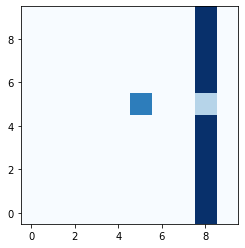

In [ ]:
############ Algorithm to perform isolated digit recognition#############
############e performance between a pair of templates with the different speakers i.e speaker 1 and speaker2
optimal_distances65=np.zeros((len(bacground_data_files6),len(bacground_data_files5)),float)

for i in range(len(bacground_data_files6)):
  tmp65_1=MFCC(bacground_data_files6[i])
  for j in range(len(bacground_data_files5)):#len(bacground_data_files2)):
    tmp65_2=MFCC(bacground_data_files5[j])
    d65,cum65,op_p65,optimal_distances65[i,j]=DTW(tmp65_1,tmp65_2)
pred_65=np.argmin(optimal_distances65,axis=1)
act_65=[]
for i in range(10):
  for j in range(10):
    act_65.append(i)
act_65=np.asarray(act_65)
##########accuaracy of the model when ten templates are considered with the same speaker
acc_65=(np.sum(pred_65==act_65)/100)*100
print("accuracy in percentage",acc_65)
#######confusion matrix
conf_mat65=np.zeros((10,10),int)
# print(act_35)
# print(pred_35)
for i in range(100):
  conf_mat65[act_65[i],pred_65[i]]=conf_mat65[act_65[i],pred_65[i]]+1
print("confusion matrix\n",conf_mat65)

plt.imshow(conf_mat65, interpolation='nearest', cmap='Blues')
plt.gca().invert_yaxis()

##########OBSERVATION: from the confusion matrix below, it can be observed that the performance of the model is very bad when used for isolated digit recognition between different speakers.
############### This could be improved by using the concept of HMM and biuld a model using HMM for isolated digit recognition task. As HMM deals with the concept of probabilities it produces better results compared to that of DTW which uses the distance metric